# Cell Line Exp-PTM Distance Comparisons
There are 37 cell lines that are measured both in both CST (post-translational-modification, PTM) and CCLE (gene expression) datasets. We expect that the cell lines should be arranged similarly in PTM-space and gene-expression-space - in other words cell line distances measured based on PTM or gene-expression data should be similar. 

Since the gene expression data is not missing any data and has already been pre-normalized by the CCLE, we trust gene expression data more than PTM data. Furthermore, we can use cell-line distances in gene-expression-space as a measure for how well we have processed the PTM data. For instance, we would expect that if a normalization procedure is improving the the PTM data then cell line distances in PTM-space should become more similar to cell line distances in gene-expression-space. 

We can use the Mantel test to measure the correlation between the two distance matrices, PTM and gene-expression distance matrices, and determine if our normalization procedures are improving the PTM data. 

### Python Scripts
First, I made a version of the PTM ratio data (including all PTM types) that was comparable to the CCLE data. This involved only keeping the 37 cell lines found in the CCLE data and averaging over repeat measurements of the same cell line in the CST data: `make_CCLE_comparable_PTM_matrix.py`.

I used the following python scripts to perform these calculations. `precalc_PTM_norm.py` was used to pre-calculate different versions of the PTM and gene-expression data where different normalization procetures were performed (e.g. column quantile normalization). 

Finally, `compare_cl_distances.py` was used to run the Mantel test and calculate the correlations between the distance matrices after a set of different normalization procedures were run. 

In [19]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import matplotlib
matplotlib.style.use('ggplot')

def load_mantel_data(data_type):
    import pandas as pd
    filename = '../lung_cellline_3_1_16/lung_cl_all_ptm/compare_cl_dist/' + data_type
    f = open(filename, 'r')
    lines = f.readlines()
    f.close()

    names = []
    corr = []
    pval = []
    zscore = []
    for i in range(len(lines)):
        inst_line = lines[i].strip().split('\t')

        if i > 0:
            names.append(inst_line[0])
            corr.append(float(inst_line[1]))
            pval.append(inst_line[2])
            zscore.append(inst_line[3])
            
    data = pd.Series(data=corr, index=names)
    
    data.plot(kind='bar', figsize=(10,3))
            
    return data

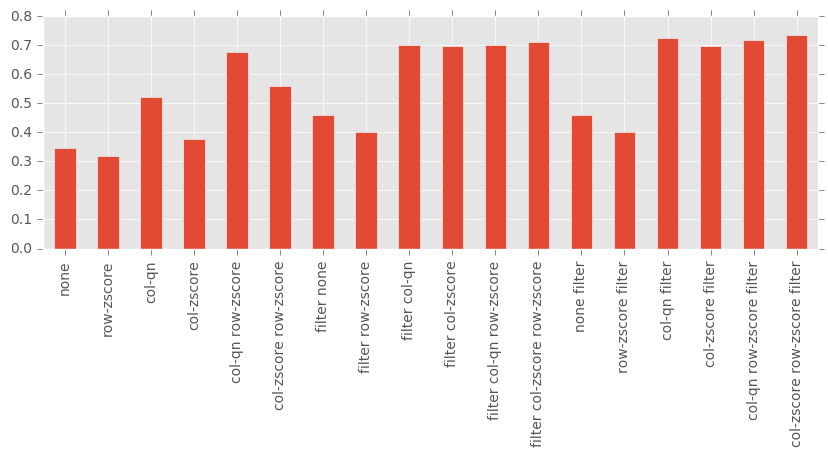

In [20]:
data = load_mantel_data('cl_exp_vs_ptm_euclidean_pairwise-False.txt')

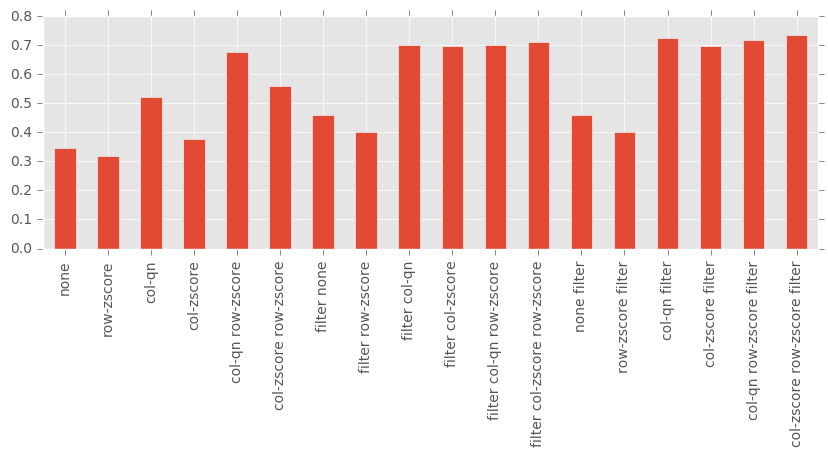

In [21]:
data = load_mantel_data('cl_exp_vs_ptm_euclidean_pairwise-False.txt')